In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"zomato.csv", encoding='Latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [3]:
# check NaN data using isna()
# drop NaN data using dropna()

df.isna().sum()
df.dropna(inplace=True)

In [4]:
# answer 1

max_rating = df["Aggregate rating"].max()
condition = df["Aggregate rating"] == max_rating
df[condition].count().iloc[0]

61

In [5]:
# answer 2

rest_by_rating = df.groupby("Aggregate rating")[["Aggregate rating"]].count()
rest_by_rating.tail(1).squeeze()

61

In [6]:
# solution 2

rest_by_rating = df.groupby("Aggregate rating")[["Restaurant Name"]].count()
max_rating_index = rest_by_rating.index.max()
rest_by_rating.loc[max_rating_index]

Restaurant Name    61
Name: 4.9, dtype: int64

In [7]:
# solution 3
# count number of unique values with value_counts()
# use either groupby() or 

rating_count = df["Aggregate rating"].value_counts()
max_rating_index = rating_count.index.max()
rating_count.loc[max_rating_index]

61

In [8]:
# How many unique cities are in the data set?
# How many rest are in Abu Dha

In [9]:
# solution

unique_cities = df["City"].nunique()
unique_cities

140

In [10]:
# solution

cities = df["City"].value_counts()
cities["Abu Dhabi"]

20

In [11]:
# Get the restaurant with the highest rating in New Delhi

In [12]:
# solution

condition_city = df["City"] == "New Delhi"
condition_rating = df["Aggregate rating"] == df[condition_city]["Aggregate rating"].max()

df[condition_city & condition_rating][["Restaurant Name", "Aggregate rating"]]

,Restaurant Name,Aggregate rating
3013,Naturals Ice Cream,4.9
3601,Indian Accent - The Manor,4.9
4298,Masala Library,4.9


In [13]:
# Which cousine is more popular, Chinese or American?

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [15]:
# solution

def count_by_cuisine(cuisine):
    return df[df["Cuisines"].str.contains(cuisine, case=False)].count()[0]

chinese_cuisine = count_by_cuisine("Chinese")
american_cuisine = count_by_cuisine("American")

print(f"{chinese_cuisine} vs {american_cuisine}")

2733 vs 405


In [16]:
# What is the name and rating of the most expenseive restaurant for two ('Average Cost for two')?

In [17]:
# solution

condition_cost = df["Average Cost for two"] == df["Average Cost for two"].max()
df[condition_cost][["Restaurant Name", "Aggregate rating", "Average Cost for two"]]

,Restaurant Name,Aggregate rating,Average Cost for two
9283,Skye,4.1,800000
9284,Satoo - Hotel Shangri-La,4.6,800000


In [18]:
# find the most expensive Chinese restaurant New Delhi
# in US Dollars 1 Indian Rupee is 0.013 United States Dollar

In [52]:
condition_city = df["City"] == "New Delhi"
condition_cuisine = df["Cuisines"].str.contains("Chinese", case=False)

nd_chi = df[condition_city & condition_cuisine].copy()
nd_chi["USD"] = nd_chi["Average Cost for two"] * 0.013

most_exp = nd_chi[nd_chi["USD"] == nd_chi["USD"].max()]
most_exp[["Restaurant Name", "City", "Cuisines", "USD"]]

,Restaurant Name,City,Cuisines,USD
4088,Tian - Asian Cuisine Studio - ITC Maurya,New Delhi,"Asian, Japanese, Korean, Thai, Chinese",91.0


In [54]:
# Plot 5 top cities by number of

In [72]:
top_5 = df["City"].value_counts().nlargest(5)
top_5

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

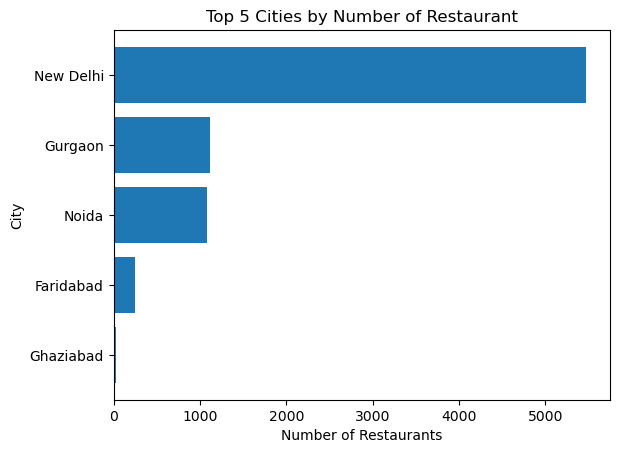

In [94]:
top_5 = df["City"].value_counts().nlargest(5)

plt.barh(top_5.index, top_5.values)
plt.title('Top 5 Cities by Number of Restaurant')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.gca().invert_yaxis()
plt.show()